In [1]:
from src import cleaning
from src import exploratory
from src import visualization
import pymysql
import sqlalchemy as alch 
from getpass import getpass
import pandas as pd
from matplotlib import pyplot as plt
import mne 

In [2]:
A1, A2, A3, A4, A5, Aa1, Aa2, Aa3, Aa4, Aa5, C1, C2, C3, C4, C5, C6, C7, C8, C9, Cc1, Cc2, Cc3, Cc4, Cc5 = cleaning.import_tables()


In [3]:
dataframes = [A1, A2, A3, A4, A5, Aa1, Aa2, Aa3, Aa4, Aa5, C1, C2, C3, C4, C5, C6, C7, C8, C9, Cc1, Cc2, Cc3, Cc4, Cc5]

for df in dataframes:
    cleaning.drop_first_column(df)

In [4]:
dataframes = [("A1", A1), ("A2", A2), ("A3", A3), ("A4", A4), ("A5", A5), 
              ("Aa1", Aa1), ("Aa2", Aa2), ("Aa3", Aa3), ("Aa4", Aa4), ("Aa5", Aa5), 
              ("C1", C1), ("C2", C2), ("C3", C3), ("C4", C4), ("C5", C5), ("C6", C6), ("C7", C7), ("C8", C8), ("C9", C9),
              ("Cc1", Cc1), ("Cc2", Cc2), ("Cc3", Cc3), ("Cc4", Cc4), ("Cc5", Cc5),]

for df_name,df in dataframes:
    result = cleaning.matching_condition(df,df_name)
    print(result)

None
None
None
None
None
None
None
None
None
None
C1 is S2 nomatch, table not useful
C2 is S2 nomatch, table not useful
None
None
C5 is S2 nomatch, table not useful
None
None
C8 is S2 nomatch, table not useful
None
None
None
None
None
None


In [5]:
#C1, C2, C5, C8 and C10 can be deleted.
Alcoholic_group1 = [A1, A2, A3, A4, A5]
Alcoholic_group2 = [Aa1, Aa2, Aa3, Aa4, Aa5]

Control_group1 = [C3, C4, C6, C7, C9]
Control_group2 = [Cc1, Cc2, Cc3, Cc4, Cc5]


Alcoholic1 = cleaning.concat_df(Alcoholic_group1)
Alcoholic2 = cleaning.concat_df(Alcoholic_group2)

Control1 = cleaning.concat_df(Control_group1)
Control2 = cleaning.concat_df(Control_group2)

In [6]:
Alcoholic1 = cleaning.delete_and_repacements_leads(Alcoholic1)
Alcoholic2 = cleaning.delete_and_repacements_leads(Alcoholic2)


Control1 = cleaning.delete_and_repacements_leads(Control1)
Control2 = cleaning.delete_and_repacements_leads(Control2)

In [7]:
exploratory.exploration(Alcoholic1)
Alcoholic1.to_csv('data/Alcoholic1.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 78080 entries, 0 to 81407
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trial number        78080 non-null  int64 
 1   sensor position     78080 non-null  object
 2   sample num          78080 non-null  int64 
 3   sensor value        78080 non-null  int64 
 4   subject identifier  78080 non-null  object
 5   matching condition  78080 non-null  object
 6   channel             78080 non-null  int64 
 7   name                78080 non-null  object
 8   time                78080 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.0+ MB


In [8]:
exploratory.exploration(Alcoholic2)
Alcoholic2.to_csv('data/Alcoholic2.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 78080 entries, 0 to 81407
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trial number        78080 non-null  int64 
 1   sensor position     78080 non-null  object
 2   sample num          78080 non-null  int64 
 3   sensor value        78080 non-null  int64 
 4   subject identifier  78080 non-null  object
 5   matching condition  78080 non-null  object
 6   channel             78080 non-null  int64 
 7   name                78080 non-null  object
 8   time                78080 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.0+ MB


In [9]:
exploratory.exploration(Control1)
Control1.to_csv('data/Control1.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 78080 entries, 0 to 81407
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trial number        78080 non-null  int64 
 1   sensor position     78080 non-null  object
 2   sample num          78080 non-null  int64 
 3   sensor value        78080 non-null  int64 
 4   subject identifier  78080 non-null  object
 5   matching condition  78080 non-null  object
 6   channel             78080 non-null  int64 
 7   name                78080 non-null  object
 8   time                78080 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.0+ MB


In [10]:
exploratory.exploration(Control2)
Control2.to_csv('data/Control2.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
Index: 78080 entries, 0 to 81407
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trial number        78080 non-null  int64 
 1   sensor position     78080 non-null  object
 2   sample num          78080 non-null  int64 
 3   sensor value        78080 non-null  int64 
 4   subject identifier  78080 non-null  object
 5   matching condition  78080 non-null  object
 6   channel             78080 non-null  int64 
 7   name                78080 non-null  object
 8   time                78080 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.0+ MB


In [11]:
A1 = visualization.transpose(A1)
A2 = visualization.transpose(A2)
A3 = visualization.transpose(A3)
A4 = visualization.transpose(A4)
A5 = visualization.transpose(A5)

Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1304.66it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1311.43it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1344.50it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1324.59it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1280.56it/s]


In [12]:
Aa1 = visualization.transpose(Aa1)
Aa2 = visualization.transpose(Aa2)
Aa3 = visualization.transpose(Aa3)
Aa4 = visualization.transpose(Aa4)
Aa5 = visualization.transpose(Aa5)

Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1194.95it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1496.84it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1469.26it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1363.41it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1359.13it/s]


In [13]:
C3 = visualization.transpose(C3)
C4 = visualization.transpose(C4)
C5 = visualization.transpose(C6)
C6 = visualization.transpose(C7)
C7 = visualization.transpose(C9)

Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1373.39it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1443.87it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1390.19it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1364.69it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 938.07it/s]


In [14]:
Cc1 = visualization.transpose(Cc1)
Cc2 = visualization.transpose(Cc2)
Cc3 = visualization.transpose(Cc3)
Cc4 = visualization.transpose(Cc4)
Cc5 = visualization.transpose(Cc5)

Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1314.29it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1285.93it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1295.16it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 976.24it/s]


Index(['trial number', 'sensor position', 'sample num', 'sensor value',
       'subject identifier', 'matching condition', 'channel', 'name', 'time'],
      dtype='object')


100%|██████████| 64/64 [00:00<00:00, 1107.24it/s]


In [24]:
Cc5

,name,trial number,matching condition,sensor position,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
0,co2c0000339,101,S2 match,AF1,c,5585,5096,5585,705,8026,...,21698,22186,22675,23651,23651,23163,22186,21698,21698,22675
1,co2c0000339,101,S2 match,AF2,c,-3947,-3947,-3459,-2482,-1506,...,-529,448,1424,2401,2401,1912,936,936,936,1912
2,co2c0000339,101,S2 match,AF7,c,-6765,-7741,-7253,-6276,-5788,...,1048,3001,4466,4466,3001,2024,2024,4466,7395,10325
3,co2c0000339,101,S2 match,AF8,c,234,722,2187,3652,414,...,707,8535,10488,11953,13418,13906,14394,15859,183,20742
4,co2c0000339,101,S2 match,AFZ,c,-3123,-3611,-3123,-2146,-117,...,6643,7619,8596,8596,8108,7131,5666,5178,5178,6154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,co2c0000339,101,S2 match,TP7,c,-8626,-12044,-13997,-13509,-12533,...,-1302,651,2116,3581,5046,651,7975,944,944,944
60,co2c0000339,101,S2 match,TP8,c,-648,-6968,-6968,-5992,-5503,...,2309,4262,6704,10122,1354,15981,16958,15981,14028,12075
61,co2c0000339,101,S2 match,X,c,2126,173,-2268,-3245,-3245,...,2614,3103,4567,6032,7497,8474,11403,16774,25075,32399
62,co2c0000339,101,S2 match,Y,c,-1005,-12492,-1298,-11515,-1005,...,-2726,-773,2157,3133,411,5086,8016,1241,1827,21688


In [15]:
channel_list = ["AF1","AF2","AF7","AF8","AFZ","C1","C2","C3","C4","C5","C6","CP1","CP2","CP3","CP4","CP5","CP6","CPZ","CZ","F1","F2","F3","F4","F5","F6","F7","F8","FC1",
                "FC2","FC3","FC4","FC5","FC6","FCZ","FP1","FP2","FPZ","FT7","FT8","FZ","O1","O2","OZ","P1","P2","P3","P4","P5","P6","P7","P8","PO1","PO2","PO7","PO8","POZ",
                "PZ","T7","T8","TP7","TP8"]

In [16]:
A1_1 = visualization.get_records(A1, "co2a0000364", 30, "S1 obj", channel_list)
A2_1 = visualization.get_records(A2, "co2a0000364", 32, "S1 obj", channel_list)
A3_1 = visualization.get_records(A3, "co2a0000364", 34, "S1 obj", channel_list)
A4_1 = visualization.get_records(A4, "co2a0000364", 36, "S1 obj", channel_list)
A5_1 = visualization.get_records(A5, "co2a0000364", 38, "S1 obj", channel_list)

In [17]:
Aa1_1 = visualization.get_records(Aa1, "co2a0000371", 61, "S2 match", channel_list)
Aa2_1 = visualization.get_records(Aa2, "co2a0000371", 65, "S2 match", channel_list)
Aa3_1 = visualization.get_records(Aa3, "co2a0000371", 71, "S2 match", channel_list)
Aa4_1 = visualization.get_records(Aa4, "co2a0000371", 75, "S2 match", channel_list)
Aa5_1 = visualization.get_records(Aa5, "co2a0000371", 77, "S2 match", channel_list)

In [18]:
C3_1 = visualization.get_records(C3, "co2c0000338", 71, "S2 match", channel_list)
C4_1 = visualization.get_records(C4, "co2c0000338", 75, "S2 match", channel_list)
C5_1 = visualization.get_records(C5, "co2c0000338", 79, "S2 match", channel_list)
C6_1 = visualization.get_records(C6, "co2c0000338", 81, "S2 match", channel_list)
C7_1 = visualization.get_records(C7, "co2c0000338", 91, "S2 match", channel_list)

In [26]:
Cc1_1 = visualization.get_records(Cc1, "co2c0000339", 79, "S2 match", channel_list)
Cc2_1 = visualization.get_records(Cc2, "co2c0000339", 85, "S2 match", channel_list)
Cc3_1 = visualization.get_records(Cc3, "co2c0000339", 91, "S2 match", channel_list)
Cc4_1 = visualization.get_records(Cc4, "co2c0000339", 99, "S2 match", channel_list)
Cc5_1 = visualization.get_records(Cc5, "co2c0000339", 101, "S2 match", channel_list)
Cc5_1

,name,trial number,matching condition,subject identifier,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,...,sample_246,sample_247,sample_248,sample_249,sample_250,sample_251,sample_252,sample_253,sample_254,sample_255
sensor position,,,,,,,,,,,,,,,,,,,,,
AF1,co2c0000339,101,S2 match,c,5585,5096,5585,705,8026,8026,...,21698,22186,22675,23651,23651,23163,22186,21698,21698,22675
AF2,co2c0000339,101,S2 match,c,-3947,-3947,-3459,-2482,-1506,-1994,...,-529,448,1424,2401,2401,1912,936,936,936,1912
AF7,co2c0000339,101,S2 match,c,-6765,-7741,-7253,-6276,-5788,-6276,...,1048,3001,4466,4466,3001,2024,2024,4466,7395,10325
AF8,co2c0000339,101,S2 match,c,234,722,2187,3652,414,3164,...,707,8535,10488,11953,13418,13906,14394,15859,183,20742
AFZ,co2c0000339,101,S2 match,c,-3123,-3611,-3123,-2146,-117,-117,...,6643,7619,8596,8596,8108,7131,5666,5178,5178,6154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PZ,co2c0000339,101,S2 match,c,-57,-1058,-1058,-57,-57,-1058,...,4801,529,6755,9196,10661,12126,12126,10661,8219,6266
T7,co2c0000339,101,S2 match,c,-7568,-10498,-11963,-11475,-10498,-9521,...,244,1221,2197,3662,5127,6592,9033,11475,13428,13916
T8,co2c0000339,101,S2 match,c,-6185,-6673,-6673,-6185,-6185,-6185,...,651,2116,4557,6999,10417,1237,13346,13346,13346,12858


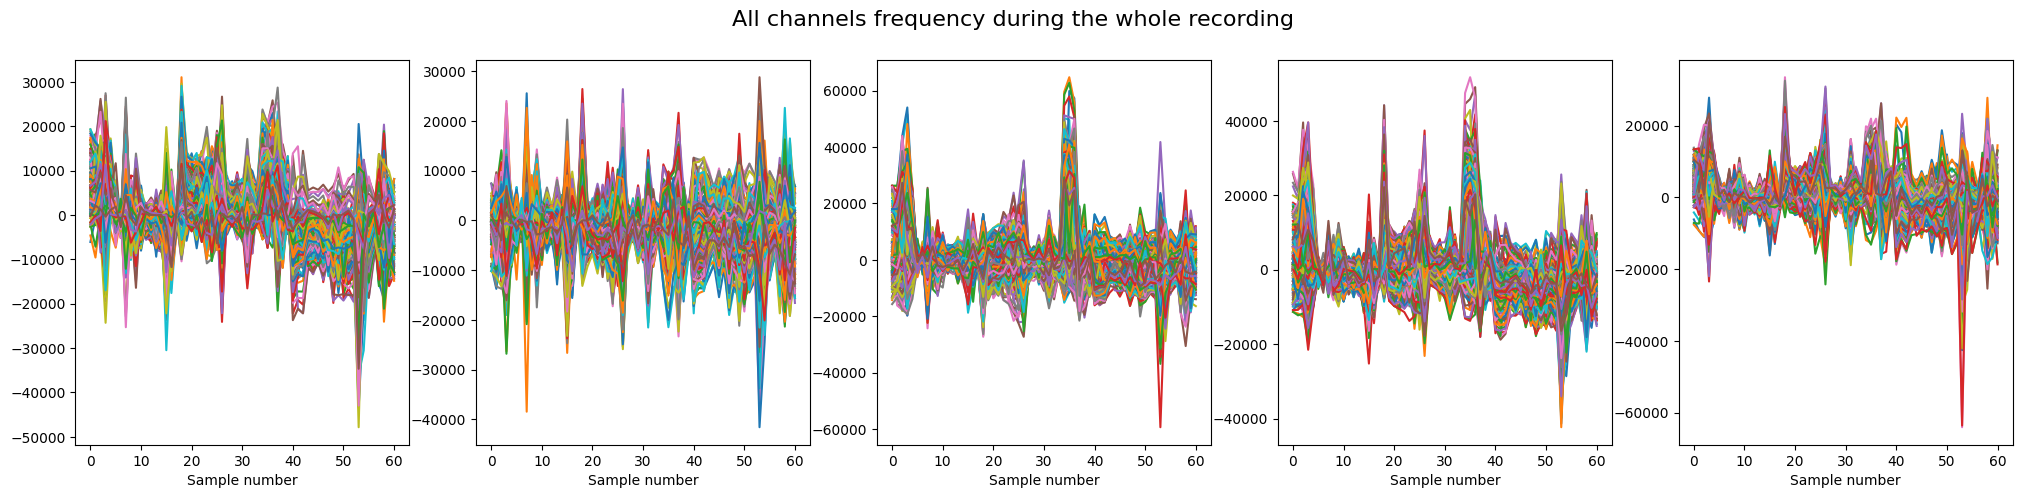

In [20]:
signal_array_A1 = visualization.signal_array(A1, 'co2a0000364', 30, 'S1 obj', channel_list)
signal_array_A2 = visualization.signal_array(A2, 'co2a0000364', 32, 'S1 obj', channel_list)
signal_array_A3 = visualization.signal_array(A3, 'co2a0000364', 34, 'S1 obj', channel_list)
signal_array_A4 = visualization.signal_array(A4, 'co2a0000364', 36, 'S1 obj', channel_list)
signal_array_A5 = visualization.signal_array(A5, 'co2a0000364', 38, 'S1 obj', channel_list)
visualization.plot([signal_array_A1, signal_array_A2, signal_array_A3, signal_array_A4, signal_array_A5])

In [25]:
signal_array_A5

array([[7507, 6531, 4578, ..., 13367, 1239, 10437],
       [6826, 3408, -1, ..., 13662, 12197, 9267],
       [-732, 3174, 6104, ..., 1001, 7568, 708],
       ...,
       [-3479, -6897, -8362, ..., 3357, 427, -2502],
       [916, 3357, 238, ..., -2502, 3357, 531],
       [-621, -6968, -10874, ..., 1821, -132, -1109]], dtype=object)

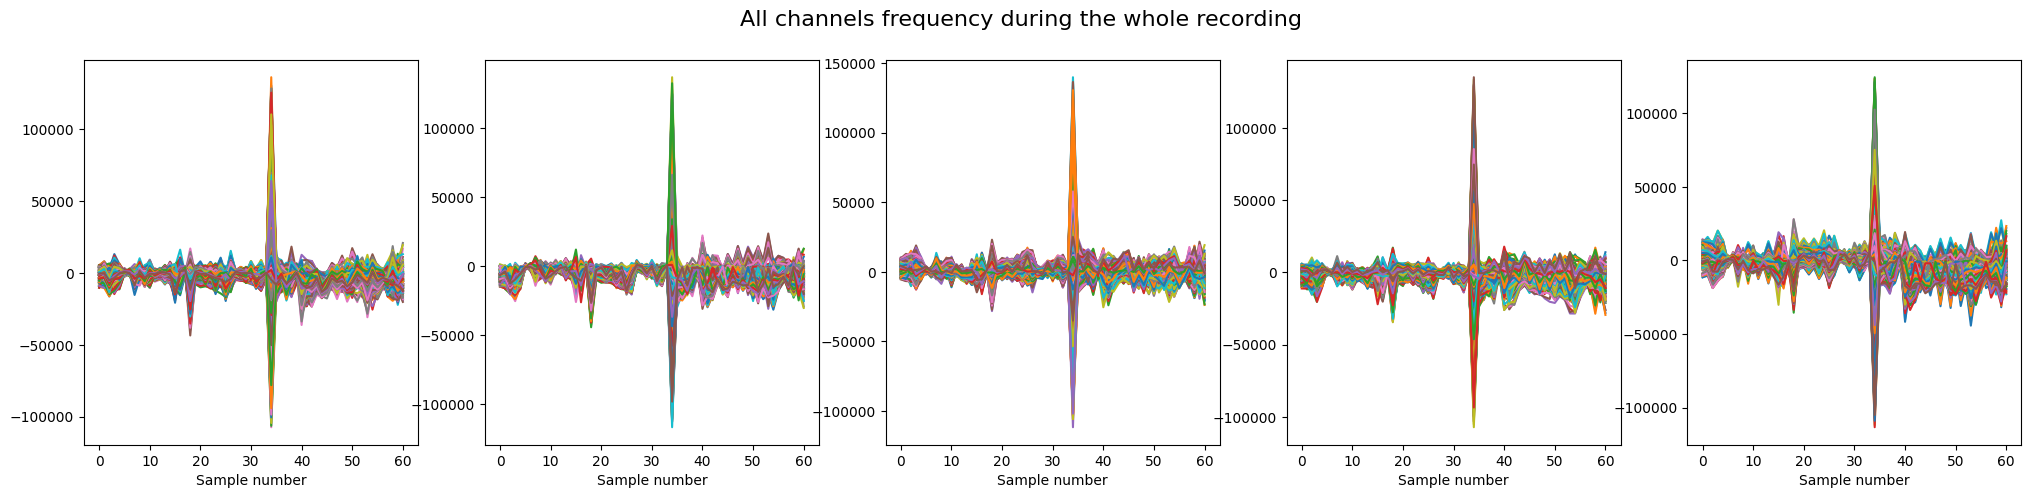

In [21]:
signal_array_Aa1_1 = visualization.signal_array(Aa1, "co2a0000371", 61, "S2 match", channel_list)
signal_array_Aa2_1 = visualization.signal_array(Aa2, "co2a0000371", 65, "S2 match", channel_list)
signal_array_Aa3_1 = visualization.signal_array(Aa3, "co2a0000371", 71, "S2 match", channel_list)
signal_array_Aa4_1 = visualization.signal_array(Aa4, "co2a0000371", 75, "S2 match", channel_list)
signal_array_Aa5_1 = visualization.signal_array(Aa5, "co2a0000371", 77, "S2 match", channel_list)
visualization.plot([signal_array_Aa1_1,signal_array_Aa2_1,signal_array_Aa3_1,signal_array_Aa4_1,signal_array_Aa5_1])

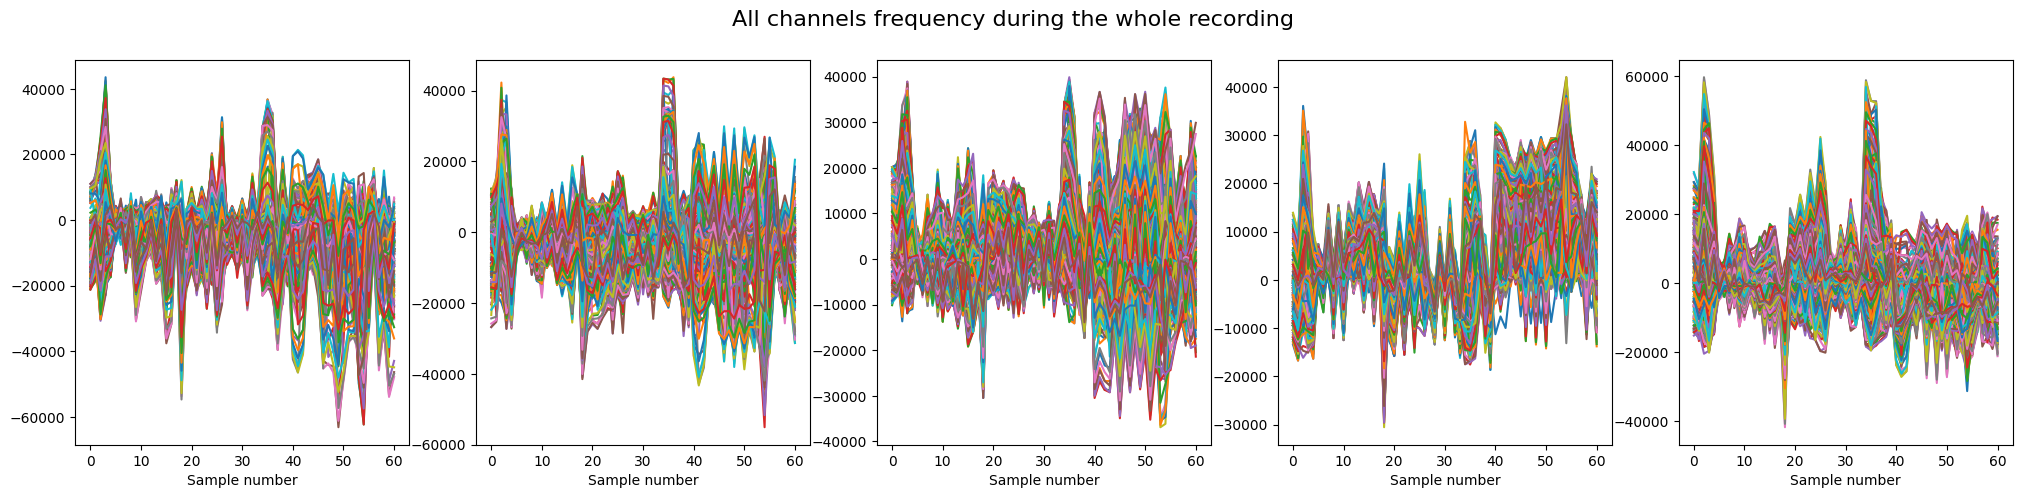

In [22]:
signal_array_C3_1 = visualization.signal_array(C3, "co2c0000338", 71, "S2 match", channel_list)
signal_array_C4_1 = visualization.signal_array(C4, "co2c0000338", 75, "S2 match", channel_list)
signal_array_C5_1 = visualization.signal_array(C5, "co2c0000338", 79, "S2 match", channel_list)
signal_array_C6_1 = visualization.signal_array(C6, "co2c0000338", 81, "S2 match", channel_list)
signal_array_C7_1 = visualization.signal_array(C7, "co2c0000338", 91, "S2 match", channel_list)
visualization.plot([signal_array_C3_1, signal_array_C4_1, signal_array_C5_1, signal_array_C6_1, signal_array_C7_1])

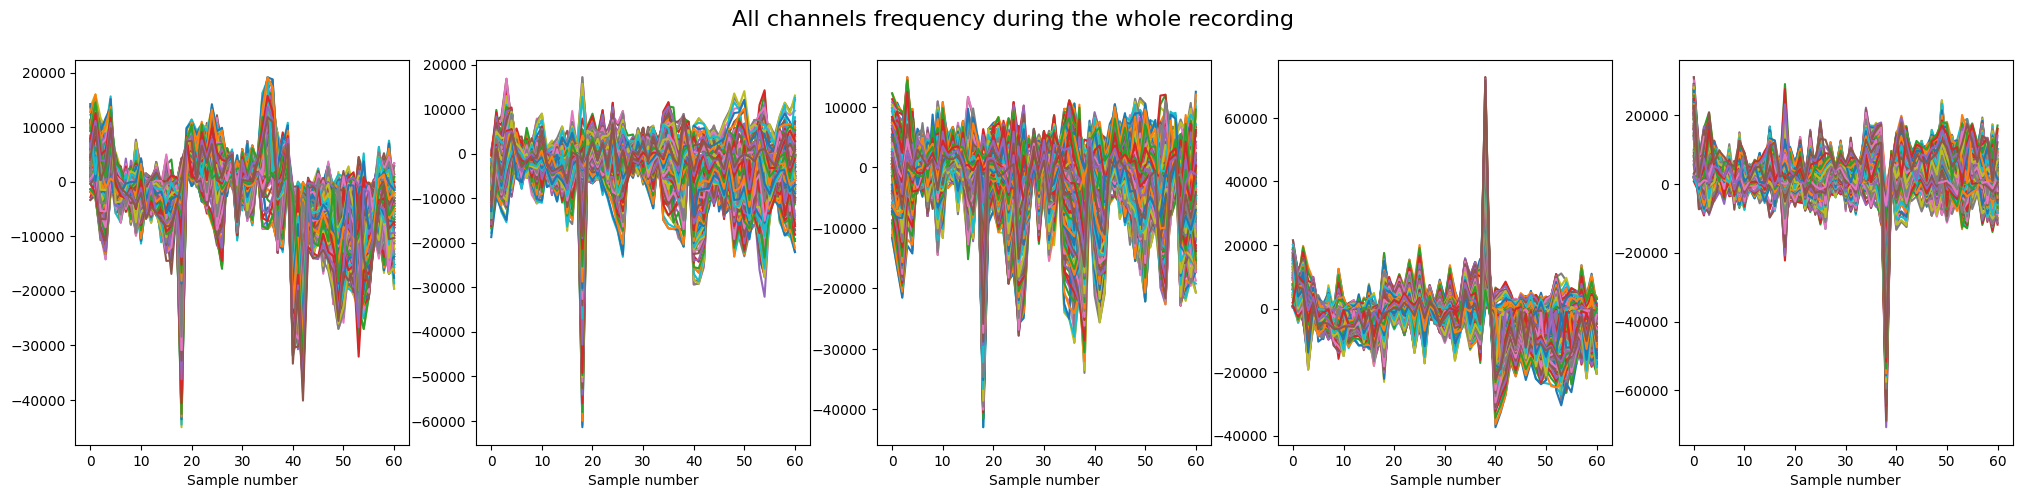

In [23]:
signal_array_Cc1_1 = visualization.signal_array(Cc1, "co2c0000339", 79, "S2 match", channel_list)
signal_array_Cc2_1 = visualization.signal_array(Cc2, "co2c0000339", 85, "S2 match", channel_list)
signal_array_Cc3_1 = visualization.signal_array(Cc3, "co2c0000339", 91, "S2 match", channel_list)
signal_array_Cc4_1 = visualization.signal_array(Cc4, "co2c0000339", 99, "S2 match", channel_list)
signal_array_Cc5_1 = visualization.signal_array(Cc5, "co2c0000339", 101, "S2 match", channel_list)
visualization.plot([signal_array_Cc1_1,signal_array_Cc2_1,signal_array_Cc3_1,signal_array_Cc4_1,signal_array_Cc5_1])